In [4]:
from statistics import mean, variance
import numpy as np
import matplotlib.pyplot as pl
from random import randint
from scipy.stats import probplot, norm, anderson, kstest, normaltest, shapiro, chisquare

In [5]:
# 31b LFSR class
class lfsr():
    
    def __init__(self):
        self.state = randint(1, (1<<31) - 1)

    def gen(self, skip):
        for _ in range(skip):
            bit = (self.state ^ (self.state >> 3) ) & 1
            self.state = (self.state >> 1) | (bit << 30)
        return self.state

In [6]:
def autocov(lag, s):
    if lag == 0:
        return variance(s)
    else:
        mu = mean(s)
        x = np.array(s[:-lag])
        y = np.array(s[lag:])
        n = len(x)
        return sum((x - mu)*(y - mu))/(n-1)

def lfsr_selfcorrelation_test(ns, sk, li):
    g = lfsr()
    s = []
    for i in range(ns):
        r = g.gen(sk) & 0xFFF
        r = float(r) / (1 << 12)
        s.append(r)

    mu = mean(s)
    print(mu)

    sg2 = variance(s)
    print(sg2)

    x_bar = np.arange(-li,li+1,1)
    v = [autocov(abs(l),s) for l in x_bar]
    pl.plot(x_bar, v)
    pl.show()

    for i, cov in enumerate(v):
        if i - li >= 0 and i - li <= 4:
            print(i - li, cov/sg2)

    pl.scatter(s[1:], s[:-1], s=1)
    pl.show()


0.4995206884765625
0.08371035239081427


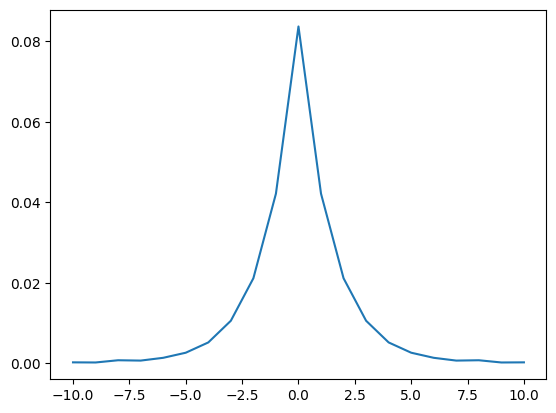

0 1.0
1 0.5033809499017905
2 0.25213579246677503
3 0.12588616124308516
4 0.061492218608585135


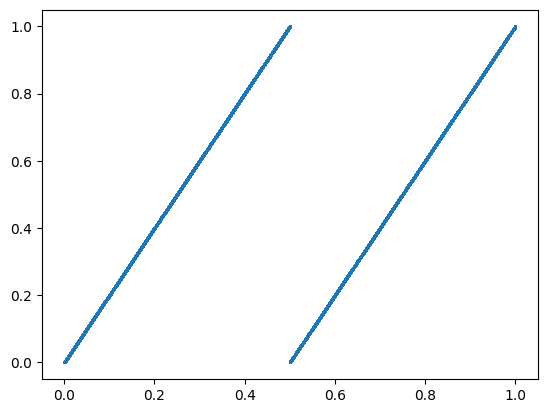

In [4]:
lfsr_selfcorrelation_test(10**5,1,10)

0.5010647485351563
0.08322282373012509


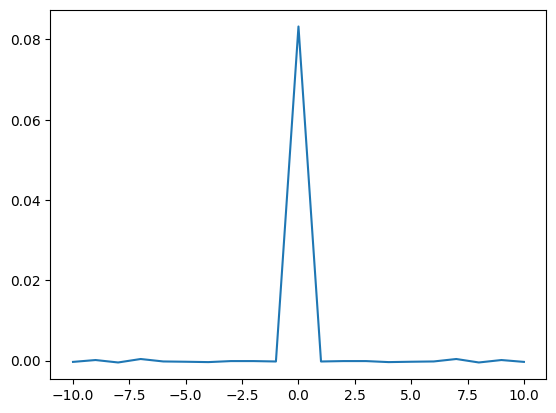

0 1.0
1 -0.002553009975663537
2 -0.0013405271608601464
3 -0.0013523708215835391
4 -0.004401000625679116


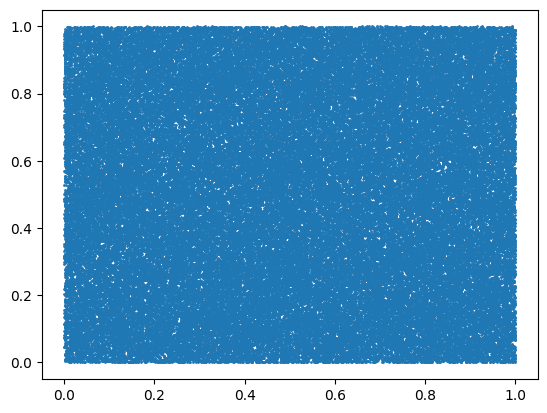

In [5]:
lfsr_selfcorrelation_test(10**5,12,10)

In [7]:
class norm_CLT_generator():
    def __init__(self):
        self.regs = []
        for _ in range(12):
            self.regs.append(lfsr())

    def sample(self, k = 1):
        r = 0
        for j in range(12):
            r += self.regs[j].gen(k) & 0xFFF
        
        # Fixed to float
        r = float(r) / (1 << 12)

        return r - 6
    
    def multi_sample(self, s = 1, k = 1):
        samples = []
        for _ in range(s):
            samples.append(self.sample(k))
        return np.array(samples)

-0.00357024169921875
1.0137273032876943


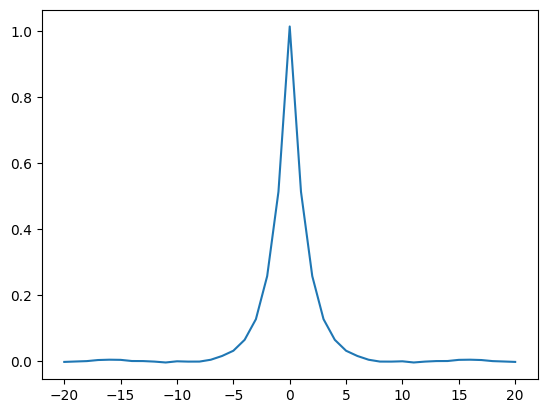

0 1.0
1 0.5064827177879672
2 0.2545695111992126
3 0.12596014621560908
4 0.06432293798528955


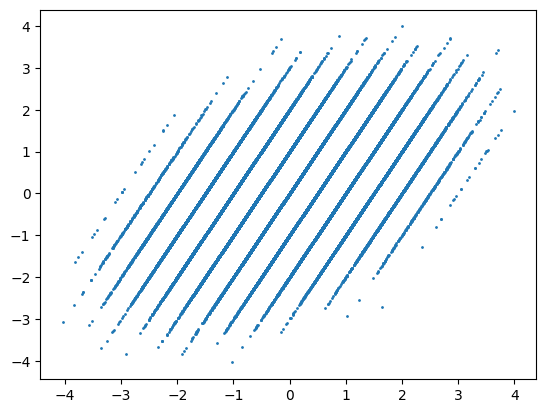

In [8]:
li = 20
g = norm_CLT_generator()
s = g.multi_sample(10**5)
mu = mean(s)
print(mu)

sg2 = variance(s)
print(sg2)

x_bar = np.arange(-li,li+1,1)
v = [autocov(abs(l),s) for l in x_bar]
pl.plot(x_bar, v)
pl.show()

for i, cov in enumerate(v):
    if i - li >= 0 and i - li <= 4:
        print(i - li, cov/sg2)

pl.scatter(s[1:], s[:-1], s=1)
pl.show()

-0.00255275146484375
0.9983429563620307


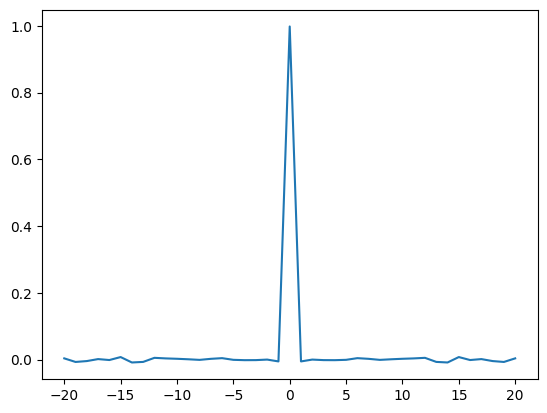

0 1.0
1 -0.0056577880768928
2 -0.00012999652416302592
3 -0.0017181380287789028
4 -0.0018840867071635617


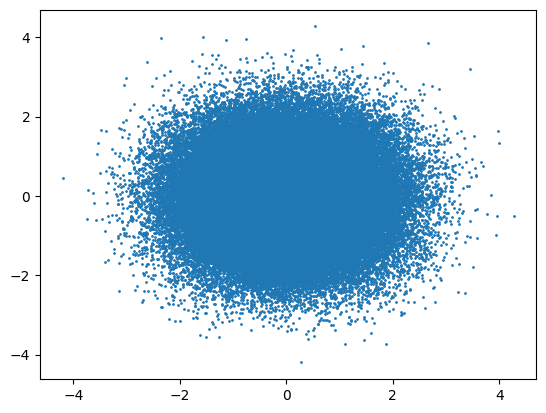

In [8]:
li = 20
g = norm_CLT_generator()
s = g.multi_sample(10**5, 12)
mu = mean(s)
print(mu)

sg2 = variance(s)
print(sg2)

x_bar = np.arange(-li,li+1,1)
v = [autocov(abs(l),s) for l in x_bar]
pl.plot(x_bar, v)
pl.show()

for i, cov in enumerate(v):
    if i - li >= 0 and i - li <= 4:
        print(i - li, cov/sg2)

pl.scatter(s[1:], s[:-1], s=1)
pl.show()

# Skip-Ahead LFSR

In [9]:
import numpy as np
import matplotlib.pyplot as pl
from random import randint

n = 31
a = np.array( [ [0] * n ] * n )

# (31 31) - (31 28) = (0 3) -- (1 4)
a[0][n-0-1] = 1
a[0][n-3-1] = 1
aj = 4

for i in range(n):
    for j in range(n):
        if i == j + 1:
            a[i][j] = 1

k = 24
print(f'k:{k} n:{n} j:{aj}, k <= (n-j), {k} <= ({n - aj})\n')

abase = a
for _ in range(k - 1):
    a = a @ abase

for i in range(n):
    ln = f'self.q2[{n-i-1}] = '
    for j in range(n):
        if a[i][j] == 1:
            ln += f'self.q[{n-j-1}] ^ '
    print(f'{ln[:-3]}')

k:24 n:31 j:4, k <= (n-j), 24 <= (27)

self.q2[30] = self.q[26] ^ self.q[23]
self.q2[29] = self.q[25] ^ self.q[22]
self.q2[28] = self.q[24] ^ self.q[21]
self.q2[27] = self.q[23] ^ self.q[20]
self.q2[26] = self.q[22] ^ self.q[19]
self.q2[25] = self.q[21] ^ self.q[18]
self.q2[24] = self.q[20] ^ self.q[17]
self.q2[23] = self.q[19] ^ self.q[16]
self.q2[22] = self.q[18] ^ self.q[15]
self.q2[21] = self.q[17] ^ self.q[14]
self.q2[20] = self.q[16] ^ self.q[13]
self.q2[19] = self.q[15] ^ self.q[12]
self.q2[18] = self.q[14] ^ self.q[11]
self.q2[17] = self.q[13] ^ self.q[10]
self.q2[16] = self.q[12] ^ self.q[9]
self.q2[15] = self.q[11] ^ self.q[8]
self.q2[14] = self.q[10] ^ self.q[7]
self.q2[13] = self.q[9] ^ self.q[6]
self.q2[12] = self.q[8] ^ self.q[5]
self.q2[11] = self.q[7] ^ self.q[4]
self.q2[10] = self.q[6] ^ self.q[3]
self.q2[9] = self.q[5] ^ self.q[2]
self.q2[8] = self.q[4] ^ self.q[1]
self.q2[7] = self.q[3] ^ self.q[0]
self.q2[6] = self.q[30]
self.q2[5] = self.q[29]
self.q2[4] = self.q[2

In [10]:
def vectonum(v):
    n = 0
    for i in range(len(v)):
        n = n | (v[i] << i)
    return n

def numtovec(n):
    v = [0] * 31
    i = 0
    while n > 0:
        v[i] = n & 1
        n = n >> 1
        i += 1
        if i == 31:
            break
    return v

class lfsr31_vec():
    def __init__(self):
        self.q = [0] * 31

    def gen(self):
        self.q2 = [0] * 31
        self.q2[30] = self.q[26] ^ self.q[23]
        self.q2[29] = self.q[25] ^ self.q[22]
        self.q2[28] = self.q[24] ^ self.q[21]
        self.q2[27] = self.q[23] ^ self.q[20]
        self.q2[26] = self.q[22] ^ self.q[19]
        self.q2[25] = self.q[21] ^ self.q[18]
        self.q2[24] = self.q[20] ^ self.q[17]
        self.q2[23] = self.q[19] ^ self.q[16]
        self.q2[22] = self.q[18] ^ self.q[15]
        self.q2[21] = self.q[17] ^ self.q[14]
        self.q2[20] = self.q[16] ^ self.q[13]
        self.q2[19] = self.q[15] ^ self.q[12]
        self.q2[18] = self.q[14] ^ self.q[11]
        self.q2[17] = self.q[13] ^ self.q[10]
        self.q2[16] = self.q[12] ^ self.q[9]
        self.q2[15] = self.q[11] ^ self.q[8]
        self.q2[14] = self.q[10] ^ self.q[7]
        self.q2[13] = self.q[9] ^ self.q[6]
        self.q2[12] = self.q[8] ^ self.q[5]
        self.q2[11] = self.q[7] ^ self.q[4]
        self.q2[10] = self.q[6] ^ self.q[3]
        self.q2[9] = self.q[5] ^ self.q[2]
        self.q2[8] = self.q[4] ^ self.q[1]
        self.q2[7] = self.q[3] ^ self.q[0]
        self.q2[6] = self.q[30]
        self.q2[5] = self.q[29]
        self.q2[4] = self.q[28]
        self.q2[3] = self.q[27]
        self.q2[2] = self.q[26]
        self.q2[1] = self.q[25]
        self.q2[0] = self.q[24]
        self.q = self.q2
        return self.q

# Simple Test
s = 0xDEADBEEF

g = lfsr31_vec()
g.q = numtovec(s)

bs = lfsr()
bs.state = s & 0x7FFFFFFF

for i in range(10**5):
    a = vectonum(g.gen())
    a1 = a & 0xFFF
    a2 = (a >> 12) & 0xFFF

    b = bs.gen(24)
    b1 = b & 0xFFF
    b2 = (b >> 12) & 0xFFF

    if(a1 != b1 or a2 != b2):
        print(f"ERROR {i} {a} {b}")
        break

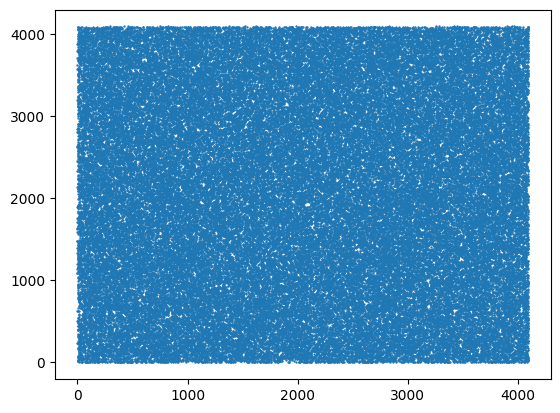

In [11]:
s = 0xDEADBEEF
g = lfsr31_vec()
g.q = numtovec(s)

s1 = []
s2 = []

for i in range(10**5):
    a = vectonum(g.gen())
    s1.append(a & 0xFFF)
    s2.append((a >> 12) & 0xFFF)

pl.scatter(s1, s2, s=0.5)
pl.show()

$$
n \rightarrow \text{Number of LFSR bits} 
\quad 
Q_t \rightarrow \text{State vector of LFSR at time}\ t
$$

$$
P = a_n x^n + a_{n-1}x^{n-1} + \dots + a_1x + 1
\quad \quad
a_i = 0 \cup 1 \quad \forall i \in [1,n]
$$

$$Q_t = \begin{pmatrix} 
q_n \\
q_{n-1} \\
\vdots \\
q_2 \\
q_1
\end{pmatrix}
\quad \quad
A = \begin{pmatrix} 
a_n & a_{n-1} & \dots & a_2 & a_1 \\ 
1 & 0 & \dots & 0 & 0 \\ 
0 & 1 & \dots & 0 & 0 \\ 
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \dots & 1 & 0 \\ 
\end{pmatrix}
\quad \quad
Q_{t+1} = A Q_t
$$

$$Q_{t+1} = 
\begin{pmatrix} 
a_n & a_{n-1} & \dots & a_2 & a_1 \\ 
1 & 0 & \dots & 0 & 0 \\ 
0 & 1 & \dots & 0 & 0 \\ 
\vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & \dots & 1 & 0 \\ 
\end{pmatrix}

\begin{pmatrix} 
q_n \\
q_{n-1} \\
\vdots \\
q_2 \\
q_1
\end{pmatrix}
=
\begin{pmatrix} 
a_nq_n \oplus a_{n-1}q_{n-1} \oplus \dots \oplus a_2q_2 \oplus a_{1}q_{1}\\
q_{n} \\
\vdots \\
q_3 \\
q_2
\end{pmatrix}
$$

$$
Q_{t+k} = A^k Q_t
$$

$$
j = \max(i) \rightarrow a_i = 1 \quad \forall i \in [1,n]
$$

$$
k \leq n - j
$$


In [13]:
# number of lsfr bits, number of skips, array of taps
def generate_lfsr_vec(n, k, el):
    # Info 
    print(f"n:{n} k:{k}")
    elf = n - np.array(el) + 1
    print(f"Exp vector {el} Mirror {elf}")
    aj = np.max(elf)
    print(f'j:{aj}, k <= (n-j), {k} <= ({n - aj})')
    print(f'period factor {((2**n - 1) / k)}')
    
    # Empty matrix
    a = np.array([[0] * n] * n)
    # Generating polynomial
    for i in (n - elf):
        a[0][i] = 1
    # Shift values
    for i in range(n):
        for j in range(n):
            if i == j + 1:
                a[i][j] = 1

    # a^k
    abase = a
    for _ in range(k - 1):
        a = a @ abase
    
    # Generate code
    xor_cost = 0
    cde = ""
    for i in range(n):
        ln = f'self.q2[{n-i-1}] = '
        c = 0
        for j in range(n):
            if a[i][j] == 1:
                ln += f'self.q[{n-j-1}] ^ '
                c += 1
        xor_cost += c - 1
        cde += f'{ln[:-3]}\n'

    print(f'XOR used: {xor_cost}\n')
    
    # Python
    print(cde)

    # VHDL
    cde = ""
    for i in range(n):
        ln = f'next_state({n-i-1}) <= '
        for j in range(n):
            if a[i][j] == 1:
                ln += f'internal_state({n-j-1}) xor '
        cde += f'{ln[:-5]};\n'
    print(cde)

    # System Verilog
    cde = ""
    for i in range(n):
        ln = f'next_state[{n-i-1}] = '
        c = 0
        for j in range(n):
            if a[i][j] == 1:
                ln += f'current_state[{n-j-1}] ^ '
                c += 1
        xor_cost += c - 1
        cde += f'{ln[:-3]};\n'
    print(cde)

# Example
generate_lfsr_vec(151, 144, [151,148])

n:151 k:144
Exp vector [151, 148] Mirror [1 4]
j:4, k <= (n-j), 144 <= (147)
period factor 1.9822884620916108e+43
XOR used: 144

self.q2[150] = self.q[146] ^ self.q[143]
self.q2[149] = self.q[145] ^ self.q[142]
self.q2[148] = self.q[144] ^ self.q[141]
self.q2[147] = self.q[143] ^ self.q[140]
self.q2[146] = self.q[142] ^ self.q[139]
self.q2[145] = self.q[141] ^ self.q[138]
self.q2[144] = self.q[140] ^ self.q[137]
self.q2[143] = self.q[139] ^ self.q[136]
self.q2[142] = self.q[138] ^ self.q[135]
self.q2[141] = self.q[137] ^ self.q[134]
self.q2[140] = self.q[136] ^ self.q[133]
self.q2[139] = self.q[135] ^ self.q[132]
self.q2[138] = self.q[134] ^ self.q[131]
self.q2[137] = self.q[133] ^ self.q[130]
self.q2[136] = self.q[132] ^ self.q[129]
self.q2[135] = self.q[131] ^ self.q[128]
self.q2[134] = self.q[130] ^ self.q[127]
self.q2[133] = self.q[129] ^ self.q[126]
self.q2[132] = self.q[128] ^ self.q[125]
self.q2[131] = self.q[127] ^ self.q[124]
self.q2[130] = self.q[126] ^ self.q[123]
self.q2[12

In [14]:
class lfsr151_vec():
    def __init__(self):
        self.q = [0] * 151

    def random_seed(self):
        for i in range(151):
            self.q[i] = randint(0,1)

    def gen(self):
        self.q2 = [0] * 151
        self.q2[150] = self.q[146] ^ self.q[143]
        self.q2[149] = self.q[145] ^ self.q[142]
        self.q2[148] = self.q[144] ^ self.q[141]
        self.q2[147] = self.q[143] ^ self.q[140]
        self.q2[146] = self.q[142] ^ self.q[139]
        self.q2[145] = self.q[141] ^ self.q[138]
        self.q2[144] = self.q[140] ^ self.q[137]
        self.q2[143] = self.q[139] ^ self.q[136]
        self.q2[142] = self.q[138] ^ self.q[135]
        self.q2[141] = self.q[137] ^ self.q[134]
        self.q2[140] = self.q[136] ^ self.q[133]
        self.q2[139] = self.q[135] ^ self.q[132]
        self.q2[138] = self.q[134] ^ self.q[131]
        self.q2[137] = self.q[133] ^ self.q[130]
        self.q2[136] = self.q[132] ^ self.q[129]
        self.q2[135] = self.q[131] ^ self.q[128]
        self.q2[134] = self.q[130] ^ self.q[127]
        self.q2[133] = self.q[129] ^ self.q[126]
        self.q2[132] = self.q[128] ^ self.q[125]
        self.q2[131] = self.q[127] ^ self.q[124]
        self.q2[130] = self.q[126] ^ self.q[123]
        self.q2[129] = self.q[125] ^ self.q[122]
        self.q2[128] = self.q[124] ^ self.q[121]
        self.q2[127] = self.q[123] ^ self.q[120]
        self.q2[126] = self.q[122] ^ self.q[119]
        self.q2[125] = self.q[121] ^ self.q[118]
        self.q2[124] = self.q[120] ^ self.q[117]
        self.q2[123] = self.q[119] ^ self.q[116]
        self.q2[122] = self.q[118] ^ self.q[115]
        self.q2[121] = self.q[117] ^ self.q[114]
        self.q2[120] = self.q[116] ^ self.q[113]
        self.q2[119] = self.q[115] ^ self.q[112]
        self.q2[118] = self.q[114] ^ self.q[111]
        self.q2[117] = self.q[113] ^ self.q[110]
        self.q2[116] = self.q[112] ^ self.q[109]
        self.q2[115] = self.q[111] ^ self.q[108]
        self.q2[114] = self.q[110] ^ self.q[107]
        self.q2[113] = self.q[109] ^ self.q[106]
        self.q2[112] = self.q[108] ^ self.q[105]
        self.q2[111] = self.q[107] ^ self.q[104]
        self.q2[110] = self.q[106] ^ self.q[103]
        self.q2[109] = self.q[105] ^ self.q[102]
        self.q2[108] = self.q[104] ^ self.q[101]
        self.q2[107] = self.q[103] ^ self.q[100]
        self.q2[106] = self.q[102] ^ self.q[99]
        self.q2[105] = self.q[101] ^ self.q[98]
        self.q2[104] = self.q[100] ^ self.q[97]
        self.q2[103] = self.q[99] ^ self.q[96]
        self.q2[102] = self.q[98] ^ self.q[95]
        self.q2[101] = self.q[97] ^ self.q[94]
        self.q2[100] = self.q[96] ^ self.q[93]
        self.q2[99] = self.q[95] ^ self.q[92]
        self.q2[98] = self.q[94] ^ self.q[91]
        self.q2[97] = self.q[93] ^ self.q[90]
        self.q2[96] = self.q[92] ^ self.q[89]
        self.q2[95] = self.q[91] ^ self.q[88]
        self.q2[94] = self.q[90] ^ self.q[87]
        self.q2[93] = self.q[89] ^ self.q[86]
        self.q2[92] = self.q[88] ^ self.q[85]
        self.q2[91] = self.q[87] ^ self.q[84]
        self.q2[90] = self.q[86] ^ self.q[83]
        self.q2[89] = self.q[85] ^ self.q[82]
        self.q2[88] = self.q[84] ^ self.q[81]
        self.q2[87] = self.q[83] ^ self.q[80]
        self.q2[86] = self.q[82] ^ self.q[79]
        self.q2[85] = self.q[81] ^ self.q[78]
        self.q2[84] = self.q[80] ^ self.q[77]
        self.q2[83] = self.q[79] ^ self.q[76]
        self.q2[82] = self.q[78] ^ self.q[75]
        self.q2[81] = self.q[77] ^ self.q[74]
        self.q2[80] = self.q[76] ^ self.q[73]
        self.q2[79] = self.q[75] ^ self.q[72]
        self.q2[78] = self.q[74] ^ self.q[71]
        self.q2[77] = self.q[73] ^ self.q[70]
        self.q2[76] = self.q[72] ^ self.q[69]
        self.q2[75] = self.q[71] ^ self.q[68]
        self.q2[74] = self.q[70] ^ self.q[67]
        self.q2[73] = self.q[69] ^ self.q[66]
        self.q2[72] = self.q[68] ^ self.q[65]
        self.q2[71] = self.q[67] ^ self.q[64]
        self.q2[70] = self.q[66] ^ self.q[63]
        self.q2[69] = self.q[65] ^ self.q[62]
        self.q2[68] = self.q[64] ^ self.q[61]
        self.q2[67] = self.q[63] ^ self.q[60]
        self.q2[66] = self.q[62] ^ self.q[59]
        self.q2[65] = self.q[61] ^ self.q[58]
        self.q2[64] = self.q[60] ^ self.q[57]
        self.q2[63] = self.q[59] ^ self.q[56]
        self.q2[62] = self.q[58] ^ self.q[55]
        self.q2[61] = self.q[57] ^ self.q[54]
        self.q2[60] = self.q[56] ^ self.q[53]
        self.q2[59] = self.q[55] ^ self.q[52]
        self.q2[58] = self.q[54] ^ self.q[51]
        self.q2[57] = self.q[53] ^ self.q[50]
        self.q2[56] = self.q[52] ^ self.q[49]
        self.q2[55] = self.q[51] ^ self.q[48]
        self.q2[54] = self.q[50] ^ self.q[47]
        self.q2[53] = self.q[49] ^ self.q[46]
        self.q2[52] = self.q[48] ^ self.q[45]
        self.q2[51] = self.q[47] ^ self.q[44]
        self.q2[50] = self.q[46] ^ self.q[43]
        self.q2[49] = self.q[45] ^ self.q[42]
        self.q2[48] = self.q[44] ^ self.q[41]
        self.q2[47] = self.q[43] ^ self.q[40]
        self.q2[46] = self.q[42] ^ self.q[39]
        self.q2[45] = self.q[41] ^ self.q[38]
        self.q2[44] = self.q[40] ^ self.q[37]
        self.q2[43] = self.q[39] ^ self.q[36]
        self.q2[42] = self.q[38] ^ self.q[35]
        self.q2[41] = self.q[37] ^ self.q[34]
        self.q2[40] = self.q[36] ^ self.q[33]
        self.q2[39] = self.q[35] ^ self.q[32]
        self.q2[38] = self.q[34] ^ self.q[31]
        self.q2[37] = self.q[33] ^ self.q[30]
        self.q2[36] = self.q[32] ^ self.q[29]
        self.q2[35] = self.q[31] ^ self.q[28]
        self.q2[34] = self.q[30] ^ self.q[27]
        self.q2[33] = self.q[29] ^ self.q[26]
        self.q2[32] = self.q[28] ^ self.q[25]
        self.q2[31] = self.q[27] ^ self.q[24]
        self.q2[30] = self.q[26] ^ self.q[23]
        self.q2[29] = self.q[25] ^ self.q[22]
        self.q2[28] = self.q[24] ^ self.q[21]
        self.q2[27] = self.q[23] ^ self.q[20]
        self.q2[26] = self.q[22] ^ self.q[19]
        self.q2[25] = self.q[21] ^ self.q[18]
        self.q2[24] = self.q[20] ^ self.q[17]
        self.q2[23] = self.q[19] ^ self.q[16]
        self.q2[22] = self.q[18] ^ self.q[15]
        self.q2[21] = self.q[17] ^ self.q[14]
        self.q2[20] = self.q[16] ^ self.q[13]
        self.q2[19] = self.q[15] ^ self.q[12]
        self.q2[18] = self.q[14] ^ self.q[11]
        self.q2[17] = self.q[13] ^ self.q[10]
        self.q2[16] = self.q[12] ^ self.q[9]
        self.q2[15] = self.q[11] ^ self.q[8]
        self.q2[14] = self.q[10] ^ self.q[7]
        self.q2[13] = self.q[9] ^ self.q[6]
        self.q2[12] = self.q[8] ^ self.q[5]
        self.q2[11] = self.q[7] ^ self.q[4]
        self.q2[10] = self.q[6] ^ self.q[3]
        self.q2[9] = self.q[5] ^ self.q[2]
        self.q2[8] = self.q[4] ^ self.q[1]
        self.q2[7] = self.q[3] ^ self.q[0]
        self.q2[6] = self.q[150]
        self.q2[5] = self.q[149]
        self.q2[4] = self.q[148]
        self.q2[3] = self.q[147]
        self.q2[2] = self.q[146]
        self.q2[1] = self.q[145]
        self.q2[0] = self.q[144]
        self.q = self.q2
        return self.q

g = lfsr151_vec()
g.random_seed()

for b in g.q:
    print(f'{b}',end='')

0111001100100100110011101101000111101000001000100001000111001100011000101110010111111111011101101110110110110000100001000010010110001101000011111001000

In [11]:
g = lfsr151_vec()
g.random_seed()
g.gen()
acc = 0
for i in range(12):
    r = vectonum(g.q[i*12:(i+1)*12])
    r = float(r) / (1 << 12)
    print(f'[{i*12}:{(i+1)*12}] {g.q[i*12:(i+1)*12]} {r}')
    acc += r
print(acc)

[1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]


NameError: name 'vectonum' is not defined

AndersonResult(statistic=1.3115279350167839, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.00077375244140625, scale=1.0021807683062969)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
NormaltestResult(statistic=35.99178006286612, pvalue=1.529270329034603e-08)
KstestResult(statistic=0.0035951168175923365, pvalue=0.1503709783933913, statistic_location=-0.605224609375, statistic_sign=1)
Power_divergenceResult(statistic=-129803305.93525717, pvalue=1.0)


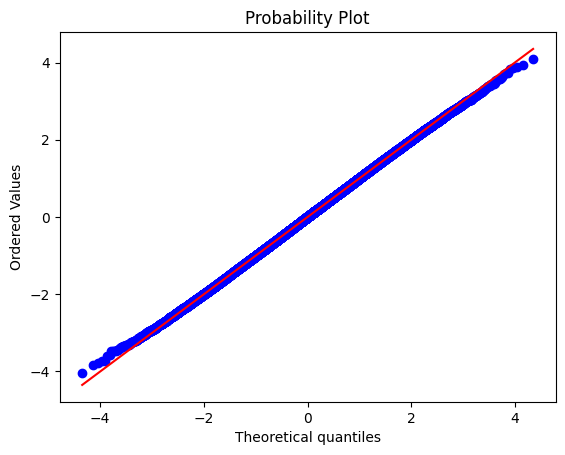

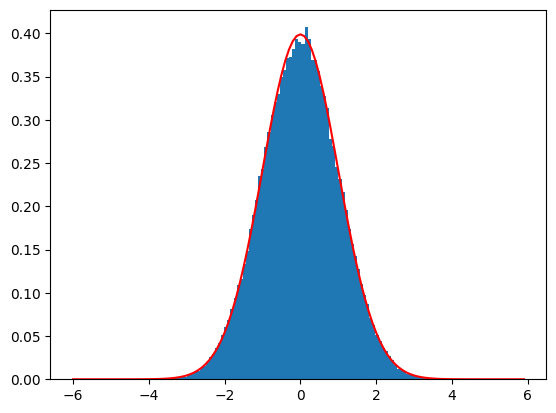

-0.00077375244140625
1.0043662923629997


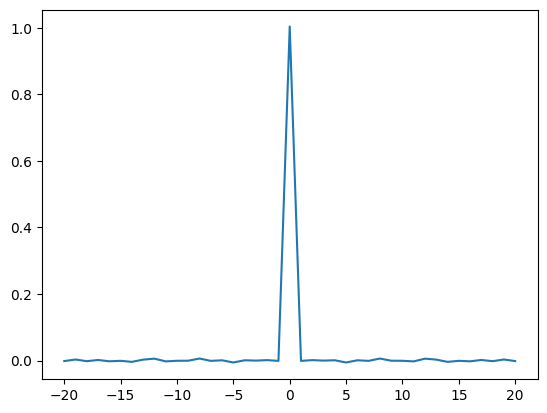

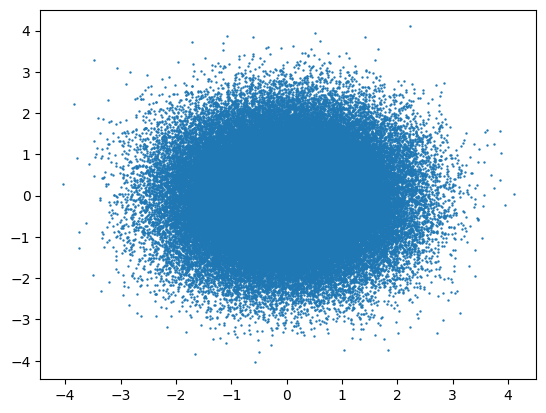

In [15]:
g = lfsr151_vec()
g.random_seed()
s = []

for _ in range(10**5):
    q = g.gen()
    acc = 0
    for i in range(12):
        r = vectonum(q[i*12:(i+1)*12])
        r = float(r) / (1 << 12)
        acc += r
    s.append(acc - 6)

print(anderson(s, dist='norm'))
print(normaltest(s))
print(kstest(s, norm.cdf))

probplot(s, plot=pl)
pl.show()

x_bar = np.arange(-6, 6, 0.1)
pl.plot(x_bar, norm.pdf(x_bar), 'r')
pl.hist(s, 100, density=True)
pl.show()

li = 20
mu = mean(s)
print(mu)
sg2 = variance(s)
print(sg2)
x_bar = np.arange(-li,li+1,1)
v = [autocov(abs(l),s) for l in x_bar]
pl.plot(x_bar, v)
pl.show()

pl.scatter(s[1:], s[:-1], s=0.5)
pl.show()

# Xorshift

In [2]:
def xorshift32(v):
    x = v
    x = x ^ ((x << 13) & 0xffffffff)
    x = x ^ ((x >> 17) & 0xffffffff)
    x = x ^ ((x << 5) & 0xffffffff)
    return x

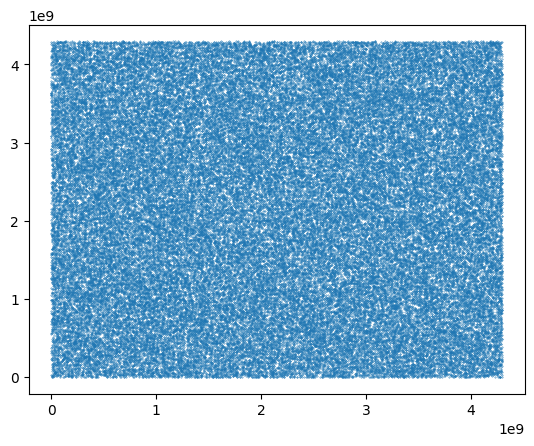

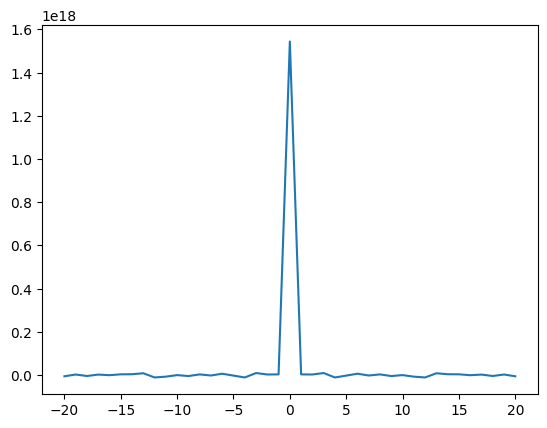

In [7]:
v = []
s = 0xDEADBEEF
for i in range(100000):
    s = xorshift32(s)
    v.append(s)

pl.scatter(v[1:], v[:-1], s=0.1)
pl.show()

x_bar = np.arange(-20,20+1,1)
v = [autocov(abs(l),v) for l in x_bar]
pl.plot(x_bar, v)
pl.show()

# Experiment

AndersonResult(statistic=0.5251736600203003, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.016276123046875, scale=0.9986273209122385)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
NormaltestResult(statistic=4.791670744733645, pvalue=0.09109654758945009)
KstestResult(statistic=0.011678322589962153, pvalue=0.12969137043658008, statistic_location=-0.46484375, statistic_sign=1)


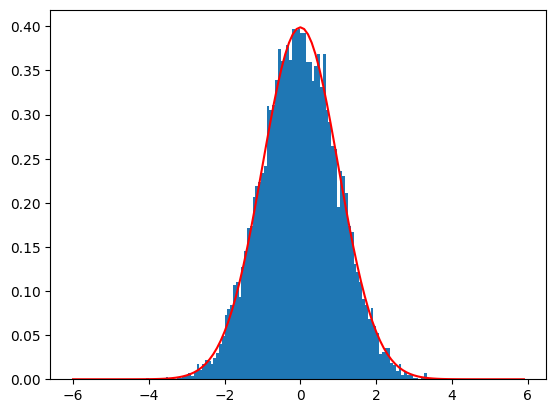

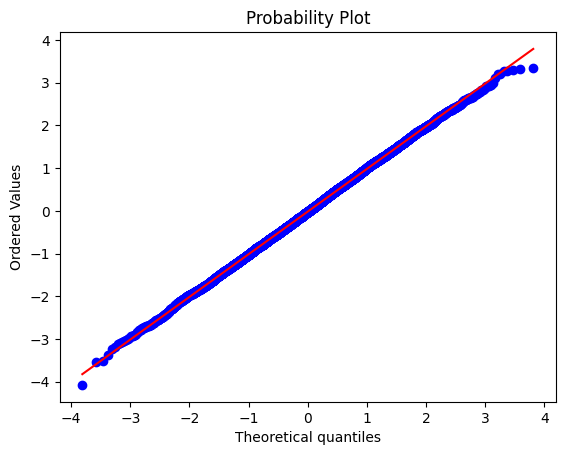

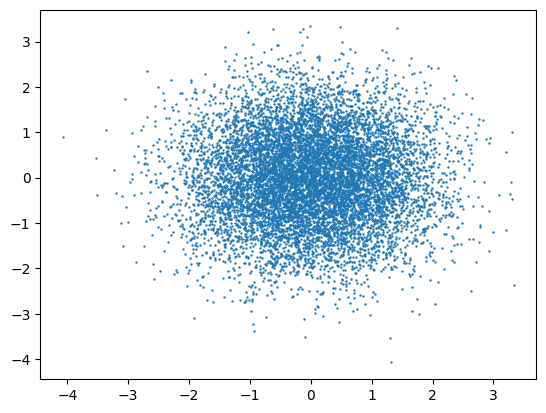

In [36]:
s = np.load('lfsr151_data.npz')['arr_0']

print(anderson(s, dist='norm'))
print(normaltest(s))
print(kstest(s, norm.cdf))

x_bar = np.arange(-6, 6, 0.1)
pl.plot(x_bar, norm.pdf(x_bar), 'r')
pl.hist(s, 100, density=True)
pl.show()

probplot(s, plot=pl)
pl.show()

pl.scatter(s[1:], s[:-1], s=0.5)
pl.show()
